# Logistic Regression from scratch on Cancer dataset

## Import libs

In [21]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = "Fantasque Sans Mono"

## Normalization 

In [8]:
# Function to normalize datapoint, X (Scaled to a range [0-1]) 
# using MIN-MAX Normalization
# Xnorm = 1 - [(Xmax−X) / (Xmax − Xmin)] 
# Equivalent to
# Xnorm = (X−Xmin) / (Xmax−Xmin)
def MinMaxNormalizer(X): 
    x_min = np.min(X, axis = 0)
    x_max = np.max(X, axis = 0)
    X_norm = 1 - ( (x_max - X) / (x_max - x_min) )
    return X_norm

## Logistic function(Sigmoid)

In [9]:
# Logistic function (Sigmoid function)
# Input : 
#   - Theta (Vector)
#   - Features (Vector)
def Sigmoid(theta, X): 
    return 1.0 / (1 + np.exp(-np.dot(X, theta.T))) 

## Loss function

In [14]:
# Computing cost using Sigmoid Cross-Entropy  bw Y and Y_predict
def cost_func(theta, X, Y): 
    # Logistic function
    Y_pred = Sigmoid(theta, X)
    Y = np.squeeze(Y)
    # Cross-Entropy Loss function 
    equation_1 = Y * np.log(Y_pred) 
    equation_2 = (1 - Y) * np.log(1 - Y_pred) 
    final_equation = - equation_1 - equation_2 
    return np.mean(final_equation) 

## FullBatch GD optimizer

In [15]:
# Batch Gradient Descent for weights updation(Theta)
def BatchGradientDescent(X, Y, theta, learning_rate=0.005, cost_threshold=0.001):
    cost = []
    iterations = []
    iterations.append(0)
    cost.append(cost_func(theta, X, Y)) 
    change_cost = 1
    num_iter = 0
    
    # FullBatch Gradien descent based on thresholding 
    while change_cost > cost_threshold: 
        equation_1 = Sigmoid(theta, X) - Y.reshape(X.shape[0], -1) 
        equation_2 = np.dot(equation_1.T, X) 
        # Compute Theta Vector
        theta = theta - (learning_rate * equation_2) 
        # Recompute Cost J
        cost.append(cost_func(theta, X, Y)) # cost per batch
        # Compute Change in cost 
        change_cost = cost[num_iter] - cost[num_iter+1]
        iterations.append(num_iter) 
        num_iter += 1
      
    return theta, np.array(iterations), np.array(cost)  

## Predict function 

In [16]:
# Predict the dataset and return y_predict
# Predict as 1 if x > .5
#              else 0
def predict(theta, X): 
    y_prob = Sigmoid(theta, X) 
    y_predict = np.where(y_prob >= .5, 1, 0) 
    return np.squeeze(y_predict) 

## Training and Prediction 

In [18]:
# Dataset available in sklearn
cancer_dataset = datasets.load_breast_cancer()
X = np.array(cancer_dataset.data)
Y = np.array(cancer_dataset.target) 

# Min-Max Normalization of Matrix Feature X
X = MinMaxNormalizer(X)

# Horizontal Merge X_0 with whole X
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))

# Initialize the value of Theta(Vector) to 0s
theta = np.matrix(np.zeros(X.shape[1])) 

# theta values after fitting the dataset 
theta, iteration, cost = BatchGradientDescent(X, Y, theta) 

# Predict the dataset with the new value of 'theta'
# Finding the accuracy 
y_predict = predict(theta, X)

# Compute TP TN FP FN
true_positif = [1 for y,y_p in zip(Y, y_predict) if y==y_p and y==1]
true_negatif = [1 for y,y_p in zip(Y, y_predict) if y==y_p and y==0]
false_positif = [1 for y,y_p in zip(Y, y_predict) if y==0 and y_p==1]
false_negatif = [1 for y,y_p in zip(Y, y_predict) if y==1 and y_p==0]

# True predicted 
true_predict = sum(true_positif) + sum(true_negatif)
print('NO. OF TRUE PREDICTION : {}'.format(true_predict))
print('NO. OF MISPREDICTION : {}'.format(len(false_negatif) + len(false_positif)))
print('TOTAL NO. OF SAMPLE : {}'.format(len(Y)))
print('ACCURACY : {:.2f} %'.format(true_predict/len(Y) * 100))

NO. OF TRUE PREDICTION : 562
NO. OF MISPREDICTION : 7
TOTAL NO. OF SAMPLE : 569
ACCURACY : 98.77 %


## Ploting Loss

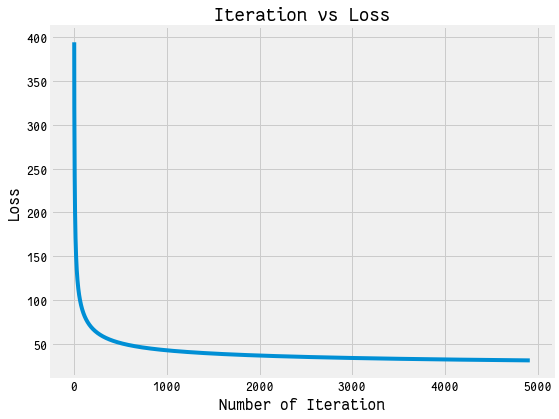

In [23]:
plt.figure(1)
plt.plot(iteration, cost)
plt.title("Iteration vs Loss")
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.show()